In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression, BayesianRidge
import xgboost as xgb
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
working=pd.read_csv(r"Hackathon_Working_Data.csv")
validation=pd.read_csv(r"Hackathon_Validation_Data.csv")
ideal=pd.read_csv(r"Hackathon_Ideal_Data.csv")

In [3]:
ideal.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [4]:
ideal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
MONTH        14260 non-null object
STORECODE    14260 non-null object
QTY          14260 non-null int64
VALUE        14260 non-null int64
GRP          14260 non-null object
SGRP         14260 non-null object
SSGRP        14260 non-null object
CMP          14260 non-null object
MBRD         14260 non-null object
BRD          14260 non-null object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


### Lets Check unique values in the categorical columns to determine which encoding to be used for categorical variable

In [5]:
ideal.MONTH.nunique()

3

In [6]:
ideal.STORECODE.nunique()

10

In [7]:
ideal.GRP.nunique()

80

In [8]:
ideal.SGRP.nunique()

177

In [9]:
ideal.SSGRP.nunique()

242

In [10]:
ideal.CMP.nunique()

512

In [11]:
ideal.MBRD.nunique()

818

In [12]:
ideal.BRD.nunique()

1613

>
> As the number of variables are high we can't use one hot encoding. We will try with LabelEncoder
>

In [13]:
working.columns.values

array(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype=object)

In [14]:
ideal.columns.values

array(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP',
       'CMP', 'MBRD', 'BRD'], dtype=object)

In [15]:
# categorical columns for encoding

#cat_columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP','CMP', 'MBRD', 'BRD']
cat_columns=['MONTH', 'GRP', 'SGRP', 'SSGRP','CMP', 'MBRD', 'BRD']

        

In [16]:
# taking the columns from working df similar to ideal df

working_encode=working[cat_columns]
ideal_encode=ideal[cat_columns]
combine_df=pd.concat([ideal_encode,working_encode],ignore_index=True)
# obtaining unique value of GRP
GRP=list(combine_df.GRP.unique())
combine_df

,MONTH,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
...,...,...,...,...,...,...,...
41240,M3,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
41241,M3,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
41242,M3,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
41243,M3,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


In [17]:
# Encoding Categorical Variables
['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP',
       'CMP', 'MBRD', 'BRD']

le_month=LabelEncoder()
le_grp=LabelEncoder()
le_sgrp=LabelEncoder()
le_ssgrp=LabelEncoder()
le_cmp=LabelEncoder()
le_mbrd=LabelEncoder()
le_brd=LabelEncoder()
le_storecode_ideal=LabelEncoder()
le_storecode_working=LabelEncoder()



combine_df['MONTH']=le_month.fit_transform(combine_df['MONTH'])
combine_df['GRP']=le_grp.fit_transform(combine_df['GRP'])
combine_df['SGRP']=le_sgrp.fit_transform(combine_df['SGRP'])
combine_df['SSGRP']=le_ssgrp.fit_transform(combine_df['SSGRP'])
combine_df['CMP']=le_cmp.fit_transform(combine_df['CMP'])
combine_df['MBRD']=le_mbrd.fit_transform(combine_df['MBRD'])
combine_df['BRD']=le_brd.fit_transform(combine_df['BRD'])

In [18]:
# ideal Dataset encoding

ideal['MONTH']=le_month.transform(ideal['MONTH'])
ideal['GRP']=le_grp.transform(ideal['GRP'])
ideal['SGRP']=le_sgrp.transform(ideal['SGRP'])
ideal['SSGRP']=le_ssgrp.transform(ideal['SSGRP'])
ideal['CMP']=le_cmp.transform(ideal['CMP'])
ideal['MBRD']=le_mbrd.transform(ideal['MBRD'])
ideal['BRD']=le_brd.transform(ideal['BRD'])
ideal['STORECODE']=le_storecode_ideal.fit_transform(ideal['STORECODE'])

In [19]:
ideal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
MONTH        14260 non-null int32
STORECODE    14260 non-null int32
QTY          14260 non-null int64
VALUE        14260 non-null int64
GRP          14260 non-null int32
SGRP         14260 non-null int32
SSGRP        14260 non-null int32
CMP          14260 non-null int32
MBRD         14260 non-null int32
BRD          14260 non-null int32
dtypes: int32(8), int64(2)
memory usage: 668.6 KB


In [20]:
# target and feature variable
X=ideal[["MONTH", "STORECODE", "VALUE", "GRP", "SGRP", "SSGRP","CMP", "MBRD", "BRD"]]
y=ideal[["QTY"]]

In [21]:
# splitting Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
# fitting with CatBoost

categorical_features_indices = np.where(X.dtypes != np.float)[0]


model=CatBoostRegressor(iterations=500, depth=7, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 32.7830578	test: 35.3159510	best: 35.3159510 (0)	total: 239ms	remaining: 1m 59s
1:	learn: 31.8572868	test: 34.4885637	best: 34.4885637 (1)	total: 398ms	remaining: 1m 39s
2:	learn: 31.0901514	test: 33.8214323	best: 33.8214323 (2)	total: 570ms	remaining: 1m 34s
3:	learn: 30.3071529	test: 33.0151809	best: 33.0151809 (3)	total: 721ms	remaining: 1m 29s
4:	learn: 29.6480800	test: 32.4022057	best: 32.4022057 (4)	total: 884ms	remaining: 1m 27s
5:	learn: 28.9657402	test: 31.6877318	best: 31.6877318 (5)	total: 953ms	remaining: 1m 18s
6:	learn: 28.4824438	test: 31.1781763	best: 31.1781763 (6)	total: 1.03s	remaining: 1m 12s
7:	learn: 28.0338042	test: 30.7162641	best: 30.7162641 (7)	total: 1.09s	remaining: 1m 6s
8:	learn: 27.6015164	test: 30.2965781	best: 30.2965781 (8)	total: 1.17s	remaining: 1m 3s
9:	learn: 27.2528158	test: 29.9125581	best: 29.9125581 (9)	total: 1.23s	remaining: 1m
10:	learn: 26.9372455	test: 29.5862041	best: 29.5862041 (10)	total: 1.31s	remaining: 58.4s
11:	learn: 26.6

95:	learn: 21.5723061	test: 25.2828050	best: 25.2708190 (94)	total: 5.98s	remaining: 25.2s
96:	learn: 21.5723058	test: 25.2828366	best: 25.2708190 (94)	total: 5.99s	remaining: 24.9s
97:	learn: 21.5476005	test: 25.2599856	best: 25.2599856 (97)	total: 6.04s	remaining: 24.8s
98:	learn: 21.5349804	test: 25.2505691	best: 25.2505691 (98)	total: 6.07s	remaining: 24.6s
99:	learn: 21.5241210	test: 25.2341163	best: 25.2341163 (99)	total: 6.1s	remaining: 24.4s
100:	learn: 21.5195671	test: 25.2341759	best: 25.2341163 (99)	total: 6.14s	remaining: 24.2s
101:	learn: 21.5086813	test: 25.2327151	best: 25.2327151 (101)	total: 6.18s	remaining: 24.1s
102:	learn: 21.5076515	test: 25.2330803	best: 25.2327151 (101)	total: 6.23s	remaining: 24s
103:	learn: 21.4738082	test: 25.2263112	best: 25.2263112 (103)	total: 6.28s	remaining: 23.9s
104:	learn: 21.4537238	test: 25.2271651	best: 25.2263112 (103)	total: 6.33s	remaining: 23.8s
105:	learn: 21.3968786	test: 25.1966092	best: 25.1966092 (105)	total: 6.37s	remainin

187:	learn: 19.5145076	test: 24.5862350	best: 24.5852535 (186)	total: 9.84s	remaining: 16.3s
188:	learn: 19.5046489	test: 24.5841628	best: 24.5841628 (188)	total: 9.89s	remaining: 16.3s
189:	learn: 19.4820968	test: 24.5835759	best: 24.5835759 (189)	total: 9.94s	remaining: 16.2s
190:	learn: 19.4808643	test: 24.5832193	best: 24.5832193 (190)	total: 9.96s	remaining: 16.1s
191:	learn: 19.4734426	test: 24.5825275	best: 24.5825275 (191)	total: 9.99s	remaining: 16s
192:	learn: 19.4581312	test: 24.5814297	best: 24.5814297 (192)	total: 10s	remaining: 16s
193:	learn: 19.4370781	test: 24.5797673	best: 24.5797673 (193)	total: 10.1s	remaining: 15.9s
194:	learn: 19.4306988	test: 24.5762036	best: 24.5762036 (194)	total: 10.1s	remaining: 15.8s
195:	learn: 19.4264482	test: 24.5748530	best: 24.5748530 (195)	total: 10.1s	remaining: 15.7s
196:	learn: 19.4132475	test: 24.5655135	best: 24.5655135 (196)	total: 10.2s	remaining: 15.7s
197:	learn: 19.4021935	test: 24.5611150	best: 24.5611150 (197)	total: 10.2s	

279:	learn: 18.5558121	test: 24.3370058	best: 24.3370058 (279)	total: 13.6s	remaining: 10.7s
280:	learn: 18.5352658	test: 24.3406682	best: 24.3370058 (279)	total: 13.7s	remaining: 10.7s
281:	learn: 18.5313763	test: 24.3423296	best: 24.3370058 (279)	total: 13.7s	remaining: 10.6s
282:	learn: 18.5219753	test: 24.3462482	best: 24.3370058 (279)	total: 13.8s	remaining: 10.6s
283:	learn: 18.5191223	test: 24.3468411	best: 24.3370058 (279)	total: 13.8s	remaining: 10.5s
284:	learn: 18.5145741	test: 24.3433107	best: 24.3370058 (279)	total: 13.9s	remaining: 10.5s
285:	learn: 18.5044831	test: 24.3458802	best: 24.3370058 (279)	total: 13.9s	remaining: 10.4s
286:	learn: 18.4573588	test: 24.3536285	best: 24.3370058 (279)	total: 14s	remaining: 10.4s
287:	learn: 18.4512801	test: 24.3493092	best: 24.3370058 (279)	total: 14s	remaining: 10.3s
288:	learn: 18.4460012	test: 24.3468272	best: 24.3370058 (279)	total: 14s	remaining: 10.3s
289:	learn: 18.4376619	test: 24.3464775	best: 24.3370058 (279)	total: 14.1s	

369:	learn: 17.6183847	test: 24.2858947	best: 24.2726311 (363)	total: 17.6s	remaining: 6.17s
370:	learn: 17.6153586	test: 24.2846050	best: 24.2726311 (363)	total: 17.6s	remaining: 6.13s
371:	learn: 17.6047894	test: 24.2778595	best: 24.2726311 (363)	total: 17.7s	remaining: 6.08s
372:	learn: 17.5954051	test: 24.2728793	best: 24.2726311 (363)	total: 17.7s	remaining: 6.03s
373:	learn: 17.5914098	test: 24.2700040	best: 24.2700040 (373)	total: 17.8s	remaining: 6s
374:	learn: 17.5799162	test: 24.2701313	best: 24.2700040 (373)	total: 17.8s	remaining: 5.95s
375:	learn: 17.5714725	test: 24.2690238	best: 24.2690238 (375)	total: 17.9s	remaining: 5.9s
376:	learn: 17.5619752	test: 24.2730694	best: 24.2690238 (375)	total: 17.9s	remaining: 5.86s
377:	learn: 17.5545935	test: 24.2694914	best: 24.2690238 (375)	total: 18s	remaining: 5.8s
378:	learn: 17.5418533	test: 24.2622995	best: 24.2622995 (378)	total: 18s	remaining: 5.75s
379:	learn: 17.5327091	test: 24.2657034	best: 24.2622995 (378)	total: 18.1s	rem

458:	learn: 16.8450462	test: 24.1950372	best: 24.1914885 (456)	total: 21.7s	remaining: 1.93s
459:	learn: 16.8427696	test: 24.1943907	best: 24.1914885 (456)	total: 21.7s	remaining: 1.89s
460:	learn: 16.8212179	test: 24.1947289	best: 24.1914885 (456)	total: 21.7s	remaining: 1.84s
461:	learn: 16.8131062	test: 24.1960969	best: 24.1914885 (456)	total: 21.8s	remaining: 1.79s
462:	learn: 16.8065405	test: 24.1978589	best: 24.1914885 (456)	total: 21.8s	remaining: 1.75s
463:	learn: 16.7995188	test: 24.1958375	best: 24.1914885 (456)	total: 21.9s	remaining: 1.7s
464:	learn: 16.7925920	test: 24.1907990	best: 24.1907990 (464)	total: 21.9s	remaining: 1.65s
465:	learn: 16.7785779	test: 24.1885437	best: 24.1885437 (465)	total: 22s	remaining: 1.6s
466:	learn: 16.7629472	test: 24.1927110	best: 24.1885437 (465)	total: 22s	remaining: 1.55s
467:	learn: 16.7547436	test: 24.1918478	best: 24.1885437 (465)	total: 22.1s	remaining: 1.51s
468:	learn: 16.7491472	test: 24.1908966	best: 24.1885437 (465)	total: 22.1s	

In [23]:
y_pred=model.predict(X_test)

# Error rate for continous data or for regressor
print('Mean Absolute Perccentage Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root mean Sqn Perc Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Perccentage Error:  8.542480128087037
Root Mean Squared Error:  583.9371020845451
Root mean Sqn Perc Error:  24.164790545017045


In [24]:
# Fitting with XGBOOST

xg=xgb.XGBRegressor(n_estimators=500)

model_xg=xg.fit(X_train,y_train)

y_pred_xg=model_xg.predict(X_test)


# Error rate for continous data or for regressor
print('Mean Absolute Perccentage Error: ', metrics.mean_absolute_error(y_test,y_pred_xg))
print('Root Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred_xg))
print('Root mean Sqn Perc Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_xg)))


Mean Absolute Perccentage Error:  6.127598082994178
Root Mean Squared Error:  317.0907222748035
Root mean Sqn Perc Error:  17.807041367807386


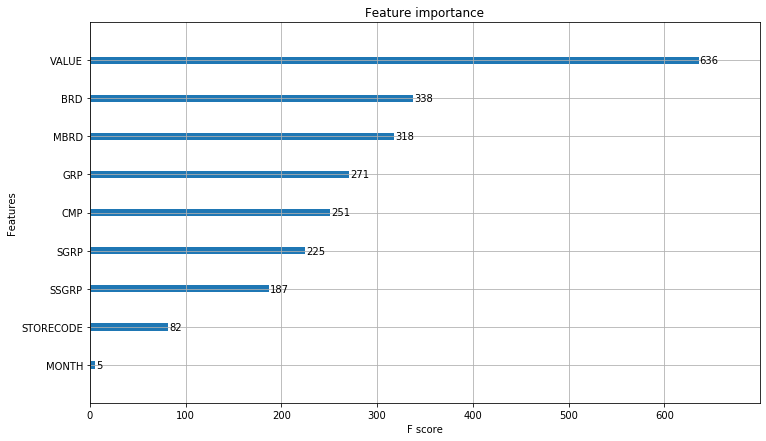

In [25]:
# plot feature importance with xgb

xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)


model_xg=xg_reg.fit(X_train,y_train)


plt.rcParams["figure.figsize"] = (12, 7)
plot_importance(model_xg,height=0.2)
plt.show()

# now lets test with working data

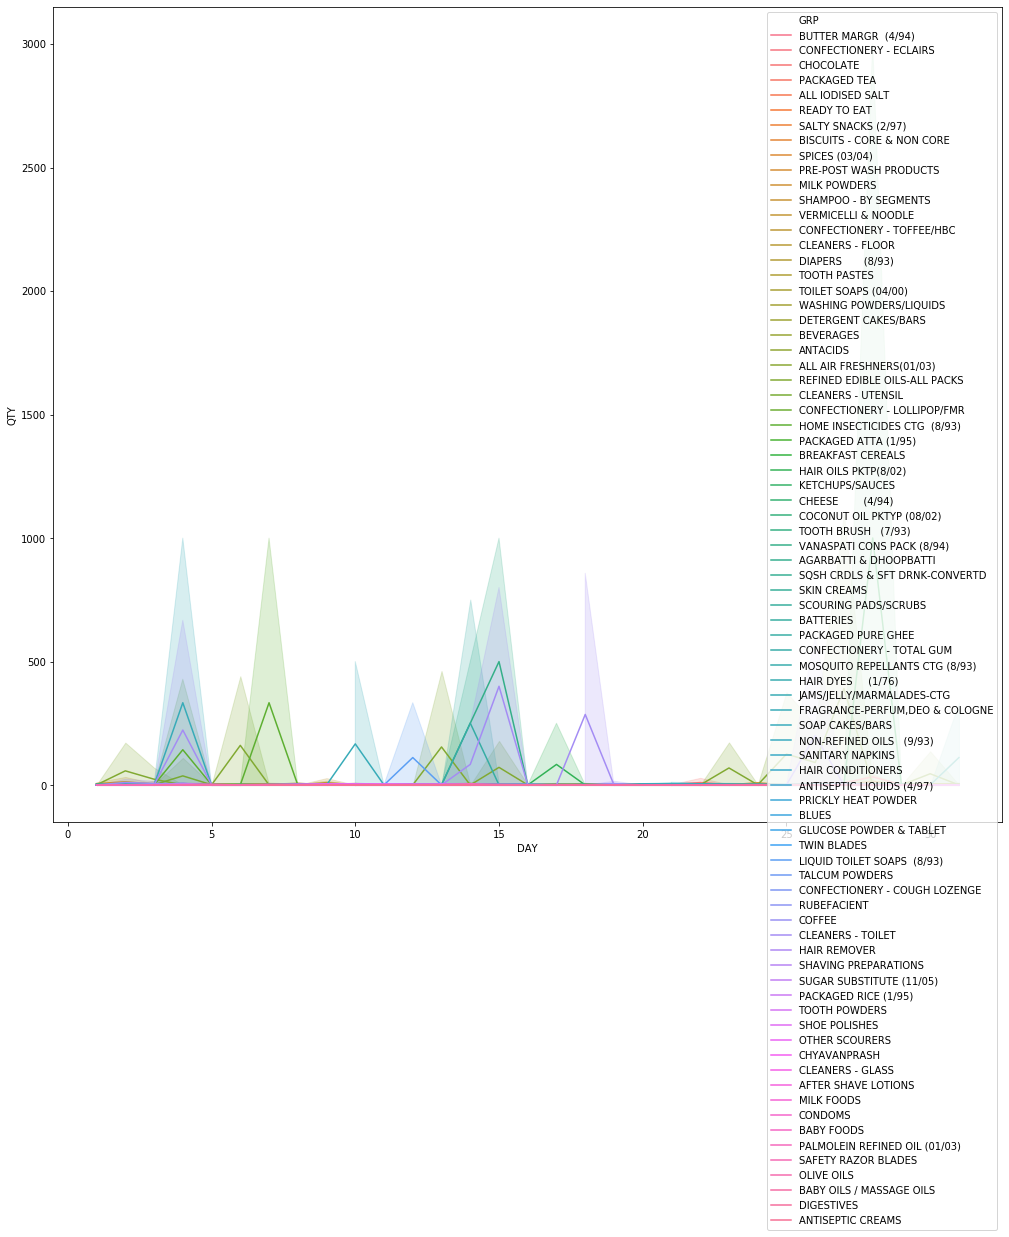

In [26]:
# lets Check the trend of quantity consumption vs days of month
plt.figure(figsize=[17,15])
sns.lineplot(x='DAY',y='QTY',data=working,hue='GRP')

> 
> We can see the sales are spiking on 4th, 14th, 15th, 27th, 28th day
>
> We can hypothize that the missing data on this days will have a similar sale surge.
>

>
> Various ways of imputation can be done. One theory to look into is if the number of sales given in the working data is under reported.
> In that case we have already trained a model on the Ideal data by which we can determine and alternated predicted sales quantity.
>


In [27]:
working['VALUE']=working['VALUE'].apply(lambda x: int(x) if x == x else "")
working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
MONTH        26985 non-null object
STORECODE    26985 non-null object
DAY          26985 non-null int64
BILL_ID      26985 non-null object
BILL_AMT     26985 non-null float64
QTY          26985 non-null float64
VALUE        26985 non-null int64
PRICE        26985 non-null float64
GRP          26985 non-null object
SGRP         26985 non-null object
SSGRP        26985 non-null object
CMP          26985 non-null object
MBRD         26985 non-null object
BRD          26985 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 2.9+ MB


In [28]:
working['MONTH']=le_month.transform(working['MONTH'])
working['GRP']=le_grp.transform(working['GRP'])
working['STORECODE']=le_storecode_working.fit_transform(working['STORECODE'])

In [29]:
X=working[['MONTH','STORECODE','DAY','GRP']]
y=working['QTY']


categorical_features_indices = np.where(X.dtypes != np.float)[0]


model_internal=CatBoostRegressor(iterations=500, depth=7, learning_rate=0.1, loss_function='RMSE')
model_internal.fit(X, y,cat_features=categorical_features_indices)



0:	learn: 95.6113246	total: 129ms	remaining: 1m 4s
1:	learn: 95.5512212	total: 200ms	remaining: 49.8s
2:	learn: 94.9927514	total: 321ms	remaining: 53.1s
3:	learn: 94.3491492	total: 450ms	remaining: 55.8s
4:	learn: 93.4192557	total: 545ms	remaining: 53.9s
5:	learn: 93.3817192	total: 634ms	remaining: 52.2s
6:	learn: 93.3296394	total: 732ms	remaining: 51.6s
7:	learn: 93.2028707	total: 798ms	remaining: 49.1s
8:	learn: 93.2028690	total: 815ms	remaining: 44.5s
9:	learn: 93.0491048	total: 889ms	remaining: 43.5s
10:	learn: 93.0310414	total: 960ms	remaining: 42.7s
11:	learn: 93.0202121	total: 1.01s	remaining: 41.3s
12:	learn: 92.2461032	total: 1.09s	remaining: 40.9s
13:	learn: 92.2277633	total: 1.14s	remaining: 39.7s
14:	learn: 92.2222916	total: 1.2s	remaining: 38.7s
15:	learn: 92.2161736	total: 1.25s	remaining: 38s
16:	learn: 91.1702494	total: 1.3s	remaining: 37s
17:	learn: 90.3488504	total: 1.35s	remaining: 36.3s
18:	learn: 88.9992011	total: 1.4s	remaining: 35.4s
19:	learn: 88.8499536	total: 

164:	learn: 70.5036027	total: 4.98s	remaining: 10.1s
165:	learn: 70.4958125	total: 5s	remaining: 10.1s
166:	learn: 70.4895225	total: 5.01s	remaining: 10s
167:	learn: 70.4865103	total: 5.03s	remaining: 9.94s
168:	learn: 70.4682871	total: 5.04s	remaining: 9.88s
169:	learn: 70.4636094	total: 5.06s	remaining: 9.82s
170:	learn: 70.4225961	total: 5.08s	remaining: 9.77s
171:	learn: 70.4063217	total: 5.09s	remaining: 9.71s
172:	learn: 70.3917296	total: 5.11s	remaining: 9.66s
173:	learn: 70.3663624	total: 5.13s	remaining: 9.61s
174:	learn: 70.3595144	total: 5.14s	remaining: 9.55s
175:	learn: 70.3553876	total: 5.17s	remaining: 9.51s
176:	learn: 70.3519660	total: 5.18s	remaining: 9.46s
177:	learn: 70.3502364	total: 5.2s	remaining: 9.4s
178:	learn: 70.1224250	total: 5.22s	remaining: 9.36s
179:	learn: 70.1211418	total: 5.24s	remaining: 9.31s
180:	learn: 70.1185339	total: 5.25s	remaining: 9.26s
181:	learn: 70.1169086	total: 5.27s	remaining: 9.21s
182:	learn: 70.1038101	total: 5.29s	remaining: 9.15s


327:	learn: 66.1749133	total: 7.77s	remaining: 4.08s
328:	learn: 66.1589198	total: 7.79s	remaining: 4.05s
329:	learn: 66.1497156	total: 7.81s	remaining: 4.02s
330:	learn: 66.1485405	total: 7.82s	remaining: 3.99s
331:	learn: 66.1114766	total: 7.84s	remaining: 3.97s
332:	learn: 66.1112295	total: 7.86s	remaining: 3.94s
333:	learn: 66.1109571	total: 7.87s	remaining: 3.91s
334:	learn: 66.1107326	total: 7.89s	remaining: 3.89s
335:	learn: 66.1105472	total: 7.91s	remaining: 3.86s
336:	learn: 66.1103263	total: 7.92s	remaining: 3.83s
337:	learn: 66.1019247	total: 7.94s	remaining: 3.81s
338:	learn: 66.0965687	total: 7.96s	remaining: 3.78s
339:	learn: 66.0964148	total: 7.98s	remaining: 3.75s
340:	learn: 66.0953932	total: 7.99s	remaining: 3.73s
341:	learn: 66.0945482	total: 8.01s	remaining: 3.7s
342:	learn: 66.0855584	total: 8.02s	remaining: 3.67s
343:	learn: 66.0852703	total: 8.04s	remaining: 3.65s
344:	learn: 66.0803941	total: 8.06s	remaining: 3.62s
345:	learn: 66.0740125	total: 8.07s	remaining: 

490:	learn: 61.8419258	total: 10.6s	remaining: 193ms
491:	learn: 61.8050639	total: 10.6s	remaining: 172ms
492:	learn: 61.8036673	total: 10.6s	remaining: 150ms
493:	learn: 61.8035053	total: 10.6s	remaining: 129ms
494:	learn: 61.7905058	total: 10.6s	remaining: 107ms
495:	learn: 61.7901769	total: 10.6s	remaining: 85.8ms
496:	learn: 61.7899052	total: 10.7s	remaining: 64.3ms
497:	learn: 61.7779663	total: 10.7s	remaining: 42.9ms
498:	learn: 61.7661683	total: 10.7s	remaining: 21.4ms
499:	learn: 61.4832771	total: 10.7s	remaining: 0us


In [30]:
xg_internal=xgb.XGBRegressor(n_estimators=500)

model_xg_internal=xg_internal.fit(X,y)


In [31]:
working['MONTH']=le_month.inverse_transform(working['MONTH'])
working['GRP']=le_grp.inverse_transform(working['GRP'])
working['STORECODE']=le_storecode_working.inverse_transform(working['STORECODE'])

In [32]:
# lets see if there is any missing days data in the dataset
days_of_month=np.arange(1,32)

days=working.groupby(['STORECODE','MONTH'])['DAY'].unique().reset_index(level=['STORECODE','MONTH'])



for i in range(0,len(days)):
    temp=[]
    for j in days_of_month:
        if j not in days['DAY'][i]:
            temp.append(j)
        else:
            continue      
    days.at[i,'DAY']=temp
    days.at[i,'count']=len(temp)

print(days['count'].sum())
print(days)
days.drop(['count'],axis=1,inplace=True)

267.0
   STORECODE MONTH                                                DAY  count
0         N1    M1              [1, 2, 3, 18, 19, 22, 23, 24, 27, 31]   10.0
1         N1    M2            [8, 10, 14, 18, 19, 20, 21, 23, 26, 29]   10.0
2         N1    M3                                [1, 21, 22, 24, 31]    5.0
3        N10    M1                                     [4, 6, 23, 28]    4.0
4        N10    M2                  [1, 6, 9, 10, 12, 16, 22, 30, 31]    9.0
5        N10    M3                               [14, 16, 19, 21, 22]    5.0
6         N2    M1                    [7, 14, 19, 21, 23, 27, 28, 31]    8.0
7         N2    M2        [5, 10, 11, 12, 16, 18, 19, 20, 23, 25, 26]   11.0
8         N2    M3   [2, 7, 8, 9, 11, 13, 16, 20, 23, 27, 29, 30, 31]   13.0
9         N3    M1               [2, 6, 7, 8, 10, 22, 23, 26, 27, 31]   10.0
10        N3    M2                       [1, 6, 8, 9, 14, 23, 26, 28]    8.0
11        N3    M3          [2, 5, 7, 12, 14, 19, 22, 23, 25, 29, 31] 

In [33]:
#missing_data=pd.DataFrame()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 4 columns):
MONTH        26985 non-null int32
STORECODE    26985 non-null int32
DAY          26985 non-null int64
GRP          26985 non-null int32
dtypes: int32(3), int64(1)
memory usage: 527.2 KB


In [34]:
missing_data=days
missing_data=missing_data.explode('DAY')
missing_data.reset_index()



,index,STORECODE,MONTH,DAY
0,0,N1,M1,1
1,0,N1,M1,2
2,0,N1,M1,3
3,0,N1,M1,18
4,0,N1,M1,19
...,...,...,...,...
262,29,N9,M3,27
263,29,N9,M3,28
264,29,N9,M3,29
265,29,N9,M3,30


In [35]:
missing_data.reset_index(drop=True,inplace=True)

In [36]:
missing_data

,STORECODE,MONTH,DAY
0,N1,M1,1
1,N1,M1,2
2,N1,M1,3
3,N1,M1,18
4,N1,M1,19
...,...,...,...
262,N9,M3,27
263,N9,M3,28
264,N9,M3,29
265,N9,M3,30


In [37]:
missing_data['GRP']=pd.Series([GRP]*len(missing_data))
missing_data=missing_data.explode('GRP')


In [38]:
missing_data.reset_index(drop=True,inplace=True)

In [39]:
missing_data

,STORECODE,MONTH,DAY,GRP
0,N1,M1,1,HAIR CONDITIONERS
1,N1,M1,1,LIQUID TOILET SOAPS (8/93)
2,N1,M1,1,DETERGENT CAKES/BARS
3,N1,M1,1,SOAP CAKES/BARS
4,N1,M1,1,WASHING POWDERS/LIQUIDS
...,...,...,...,...
21889,N9,M3,31,COCONUT OIL PKTYP (08/02)
21890,N9,M3,31,HAIR OILS PKTP(8/02)
21891,N9,M3,31,SUGAR SUBSTITUTE (11/05)
21892,N9,M3,31,CONDOMS


In [40]:
missing_data['MONTH']=le_month.transform(missing_data['MONTH'])
missing_data['GRP']=le_grp.transform(missing_data['GRP'])
missing_data['STORECODE']=le_storecode_working.fit_transform(missing_data['STORECODE'])

In [41]:

missing_data=missing_data[['MONTH','STORECODE','DAY','GRP']]
missing_data['DAY']=pd.to_numeric(missing_data['DAY'])

y_pred_internal=model_internal.predict(missing_data)


In [42]:
y_pred_internal=[0 if i < 0 else i for i in y_pred_internal]


In [43]:
y_pred_internal

[3.2642602880988587,
 0,
 4.796299687829478,
 0,
 7.968495485391427,
 7.3952460586529565,
 0,
 22.325403428895026,
 6.173541505030467,
 3.3086291515780557,
 0,
 0,
 0,
 0,
 0,
 0,
 7.748597754605077,
 0,
 5.2828688855550645,
 0,
 0,
 0,
 1.549094040300096,
 0,
 0,
 3.065695323624871,
 25.634582324193087,
 3.773470992458952,
 0.17576544293271867,
 0,
 0.4691567207612728,
 0.5194643223763689,
 0,
 3.4640137565018367,
 0,
 2.4855143856331923,
 5.787948050941604,
 4.482852895548569,
 0,
 0,
 0,
 3.642204091291338,
 579.5755914417622,
 0,
 3.1111521929894934,
 2.90441561494622,
 3.110903423459864,
 41.65363855129577,
 0,
 11.817346832331339,
 0,
 1.8286354648783933,
 2.2692592791810124,
 0,
 4.236598172113253,
 4.244756254169332,
 0,
 7.032396406226072,
 0,
 0,
 0,
 5.931855888433066,
 4.327160623852594,
 6.047201768625316,
 0,
 0,
 1.904513327722793,
 7.301229140900199,
 0,
 0,
 6.648026112439428,
 0,
 6.277649447002976,
 212.16761780263232,
 1.4127107021918701,
 0,
 3.9465617985873243,
 0

In [44]:
missing_data['MONTH']=le_month.inverse_transform(missing_data['MONTH'])
missing_data['GRP']=le_grp.inverse_transform(missing_data['GRP'])
missing_data['STORECODE']=le_storecode_working.inverse_transform(missing_data['STORECODE'])

In [45]:
missing_data['final_qty']=y_pred_internal
missing_data

,MONTH,STORECODE,DAY,GRP,final_qty
0,M1,N1,1,HAIR CONDITIONERS,3.264260
1,M1,N1,1,LIQUID TOILET SOAPS (8/93),0.000000
2,M1,N1,1,DETERGENT CAKES/BARS,4.796300
3,M1,N1,1,SOAP CAKES/BARS,0.000000
4,M1,N1,1,WASHING POWDERS/LIQUIDS,7.968495
...,...,...,...,...,...
21889,M3,N9,31,COCONUT OIL PKTYP (08/02),6.181491
21890,M3,N9,31,HAIR OILS PKTP(8/02),11.298308
21891,M3,N9,31,SUGAR SUBSTITUTE (11/05),0.132814
21892,M3,N9,31,CONDOMS,0.000000


In [46]:
missing_data.groupby(['STORECODE','MONTH','GRP'])['final_qty'].sum().reset_index(level=['STORECODE','MONTH','GRP'])

,STORECODE,MONTH,GRP,final_qty
0,N1,M1,AFTER SHAVE LOTIONS,6.757675
1,N1,M1,AGARBATTI & DHOOPBATTI,109.807897
2,N1,M1,ALL AIR FRESHNERS(01/03),35.703583
3,N1,M1,ALL IODISED SALT,57.494476
4,N1,M1,ANTACIDS,30.771994
...,...,...,...,...
2455,N9,M3,TOOTH POWDERS,35.289705
2456,N9,M3,TWIN BLADES,84.531187
2457,N9,M3,VANASPATI CONS PACK (8/94),119.144854
2458,N9,M3,VERMICELLI & NOODLE,82.566345


In [47]:
mean_value=working.groupby(['STORECODE','MONTH','GRP'])['VALUE'].mean().reset_index(level=['STORECODE','MONTH','GRP'])

In [48]:
mean_value

,STORECODE,MONTH,GRP,VALUE
0,N1,M1,AGARBATTI & DHOOPBATTI,14.000000
1,N1,M1,ALL AIR FRESHNERS(01/03),54.666667
2,N1,M1,ALL IODISED SALT,18.793103
3,N1,M1,ANTACIDS,11.166667
4,N1,M1,ANTISEPTIC LIQUIDS (4/97),50.000000
...,...,...,...,...
1522,N9,M3,TOOTH BRUSH (7/93),20.000000
1523,N9,M3,TOOTH PASTES,65.000000
1524,N9,M3,VANASPATI CONS PACK (8/94),125.000000
1525,N9,M3,VERMICELLI & NOODLE,37.000000


In [49]:
missing_data=missing_data.merge(mean_value,how='left',on=['MONTH','STORECODE','GRP'])

In [50]:
missing_data.fillna(0)


,MONTH,STORECODE,DAY,GRP,final_qty,VALUE
0,M1,N1,1,HAIR CONDITIONERS,3.264260,31.000000
1,M1,N1,1,LIQUID TOILET SOAPS (8/93),0.000000,88.800000
2,M1,N1,1,DETERGENT CAKES/BARS,4.796300,16.000000
3,M1,N1,1,SOAP CAKES/BARS,0.000000,17.000000
4,M1,N1,1,WASHING POWDERS/LIQUIDS,7.968495,55.576271
...,...,...,...,...,...,...
21889,M3,N9,31,COCONUT OIL PKTYP (08/02),6.181491,0.000000
21890,M3,N9,31,HAIR OILS PKTP(8/02),11.298308,0.000000
21891,M3,N9,31,SUGAR SUBSTITUTE (11/05),0.132814,190.000000
21892,M3,N9,31,CONDOMS,0.000000,0.000000


In [51]:
missing_data['predicted_total_value']=missing_data['final_qty']*missing_data['VALUE']

In [52]:
missing_data=missing_data[['MONTH','STORECODE','GRP','predicted_total_value']]

In [53]:
# working Dataset encoding

working['MONTH']=le_month.transform(working['MONTH'])
working['GRP']=le_grp.transform(working['GRP'])
working['SGRP']=le_sgrp.transform(working['SGRP'])
working['SSGRP']=le_ssgrp.transform(working['SSGRP'])
working['CMP']=le_cmp.transform(working['CMP'])
working['MBRD']=le_mbrd.transform(working['MBRD'])
working['BRD']=le_brd.transform(working['BRD'])
working['STORECODE']=le_storecode_working.fit_transform(working['STORECODE'])

In [54]:
working_train=working[["MONTH", "STORECODE", "VALUE", "GRP", "SGRP", "SSGRP","CMP", "MBRD", "BRD"]]



y_pred_working=model.predict(working_train)


In [55]:
y_pred_working

array([31.68239967, 10.04870259, 14.31623868, ..., 27.02819326,
        4.66853785, -0.23436627])

In [56]:
y_pred_working_xg=model_xg.predict(working_train)
y_pred_working_xg

array([2, 1, 1, ..., 2, 0, 1], dtype=int64)

In [57]:
working["predicted_qty"]=pd.Series(y_pred_working_xg)
working.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,predicted_qty
0,0,0,4,T375,225.0,1.0,225,225.0,14,27,213,155,34,68,2
1,0,0,4,T379,95.0,1.0,95,95.0,26,43,57,404,519,1201,1
2,0,0,4,T381,10.0,1.0,10,10.0,16,34,48,361,107,235,1
3,0,0,4,T382,108.0,1.0,108,108.0,54,97,133,190,966,2005,0
4,0,0,4,T384,19.0,1.0,19,19.0,3,132,189,574,892,1874,2


In [58]:
# we can check and keep a higher value QTY between the predicted and observed values

working['final_qty']=0

for index in range(0,len(working['predicted_qty'])):
    if working['QTY'][index]>working['predicted_qty'][index]:
        working.final_qty[index]=working['QTY'][index]
    else:
        working.final_qty[index]=working['predicted_qty'][index]
        

working.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,predicted_qty,final_qty
0,0,0,4,T375,225.0,1.0,225,225.0,14,27,213,155,34,68,2,2
1,0,0,4,T379,95.0,1.0,95,95.0,26,43,57,404,519,1201,1,1
2,0,0,4,T381,10.0,1.0,10,10.0,16,34,48,361,107,235,1,1
3,0,0,4,T382,108.0,1.0,108,108.0,54,97,133,190,966,2005,0,1
4,0,0,4,T384,19.0,1.0,19,19.0,3,132,189,574,892,1874,2,2


In [59]:
working['predicted_total_value']=working['final_qty']*working['VALUE']
working.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,predicted_qty,final_qty,predicted_total_value
0,0,0,4,T375,225.0,1.0,225,225.0,14,27,213,155,34,68,2,2,450
1,0,0,4,T379,95.0,1.0,95,95.0,26,43,57,404,519,1201,1,1,95
2,0,0,4,T381,10.0,1.0,10,10.0,16,34,48,361,107,235,1,1,10
3,0,0,4,T382,108.0,1.0,108,108.0,54,97,133,190,966,2005,0,1,108
4,0,0,4,T384,19.0,1.0,19,19.0,3,132,189,574,892,1874,2,2,38


In [60]:
# Decoding the feature variable

working['MONTH']=le_month.inverse_transform(working['MONTH'])
working['GRP']=le_grp.inverse_transform(working['GRP'])
working['SGRP']=le_sgrp.inverse_transform(working['SGRP'])
working['SSGRP']=le_ssgrp.inverse_transform(working['SSGRP'])
working['CMP']=le_cmp.inverse_transform(working['CMP'])
working['MBRD']=le_mbrd.inverse_transform(working['MBRD'])
working['BRD']=le_brd.inverse_transform(working['BRD'])
working['STORECODE']=le_storecode_working.inverse_transform(working['STORECODE'])


In [61]:
working=working[['MONTH','STORECODE','GRP','predicted_total_value']]

In [62]:
working=pd.concat([working,missing_data],axis=0,ignore_index=True)

In [63]:
working=working.groupby(['STORECODE','MONTH','GRP'])['predicted_total_value'].sum().reset_index(level=['STORECODE','MONTH','GRP'])

In [64]:
working

,STORECODE,MONTH,GRP,predicted_total_value
0,N1,M1,AFTER SHAVE LOTIONS,0.000000
1,N1,M1,AGARBATTI & DHOOPBATTI,1627.310557
2,N1,M1,ALL AIR FRESHNERS(01/03),2190.795882
3,N1,M1,ALL IODISED SALT,1929.499643
4,N1,M1,ANTACIDS,503.620599
...,...,...,...,...
2455,N9,M3,TOOTH POWDERS,0.000000
2456,N9,M3,TWIN BLADES,0.000000
2457,N9,M3,VANASPATI CONS PACK (8/94),15143.106806
2458,N9,M3,VERMICELLI & NOODLE,3238.954764


# finalizing in the validation data file

In [84]:
validation

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS
...,...,...,...,...
2425,1122235,N10,M3,TOOTH POWDERS
2426,1122239,N10,M3,TWIN BLADES
2427,1122243,N10,M3,VANASPATI CONS PACK (8/94)
2428,1122247,N10,M3,VERMICELLI & NOODLE


In [85]:
validation=validation.merge(working,how='left',on=['MONTH','STORECODE','GRP'])

In [86]:
validation.fillna(0,inplace=True)

In [87]:
validation['predicted_total_value']=validation['predicted_total_value'].apply(lambda x: int(x) if x == x else "")

In [88]:
validation.head()

,ID,STORECODE,MONTH,GRP,predicted_total_value
0,1112535,N1,M1,AFTER SHAVE LOTIONS,0
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI,1627
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03),2190
3,1112547,N1,M1,ALL IODISED SALT,1929
4,1112551,N1,M1,ANTACIDS,503


# Submission File

In [89]:
submission = pd.DataFrame({'ID':validation['ID'],'TOTALVALUE':validation['predicted_total_value']})

In [90]:
submission.to_csv('Techgig-Neilsen.csv',index=False)